In [189]:
import pandas as pd
from scipy.stats import mannwhitneyu, chi2_contingency, spearmanr
from statsmodels.stats.multitest import multipletests
from cliffs_delta import cliffs_delta
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.float_format", "{:.6f}".format)


In [191]:
df1 = pd.read_excel("3.2_TFs_10+.xlsx")
counts = df1["DBD"].value_counts()
test_DBDs = counts[counts >= 10].index.tolist()

In [193]:
TFs_ALL_ACTUAL_RUN = pd.read_excel("ALL_1619_TFs_for_Sec3.2.xlsx")
TFs_ALL_ACTUAL_RUN

,Unnamed: 0,UniProt_id,Is_TF,Entry_Name,DBD,Length_UniProt,Length_AlphaFold,AlphaFold_Species,AlphaFold_UniProt_id,AlphaFold_Entry_Name,...,Disordered_tails_N_and_C_presence,n_IDR_pLDDT_mean,c_IDR_pLDDT_mean,number_of_dis_regions_over_10_res,disordered_regions,average_length_dis_region,longest_length_dis_region,shortest_length_dis_region,IDRs_per_100_residues,longest_IDR_as_percentage_of_protein
0,0,P05549,1,AP2A_HUMAN,AP-2,437,437,Homo sapiens,P05549,AP2A_HUMAN,...,1,43.393585,49.848571,3,"[53, 143, 22]",72.666667,143,22,0.686499,32.723112
1,1,Q92481,1,AP2B_HUMAN,AP-2,460,460,Homo sapiens,Q92481,AP2B_HUMAN,...,1,44.310152,48.026522,3,"[66, 150, 24]",80.000000,150,24,0.652174,32.608696
2,2,Q92754,1,AP2C_HUMAN,AP-2,450,450,Homo sapiens,Q92754,AP2C_HUMAN,...,1,43.309286,48.914500,3,"[56, 156, 21]",77.666667,156,21,0.666667,34.666667
3,3,Q7Z6R9,1,AP2D_HUMAN,AP-2,452,452,Homo sapiens,Q7Z6R9,AP2D_HUMAN,...,1,36.173382,45.194474,2,"[204, 39]",121.500000,204,39,0.442478,45.132743
4,4,Q6VUC0,1,AP2E_HUMAN,AP-2,442,442,Homo sapiens,Q6VUC0,AP2E_HUMAN,...,1,44.250588,49.855000,3,"[51, 155, 19]",75.000000,155,19,0.678733,35.067873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,1614,Q9P016,1,THYN1_HUMAN,Unknown,225,225,Homo sapiens,Q9P016,THYN1_HUMAN,...,0,40.610377,NaN,1,[53],53.000000,53,53,0.444444,23.555556
1615,1615,P82094,1,TMF1_HUMAN,Unknown,1093,1093,Homo sapiens,P82094,TMF1_HUMAN,...,0,NaN,NaN,4,"[418, 13, 15, 71]",129.250000,418,13,0.365965,38.243367
1616,1616,Q9NS56,1,TOPRS_HUMAN,Unknown,1045,1045,Homo sapiens,Q9NS56,TOPRS_HUMAN,...,1,42.271200,38.143020,5,"[100, 43, 36, 103, 554]",167.200000,554,36,0.478469,53.014354
1617,1617,Q15714,1,T22D1_HUMAN,Unknown,1073,1073,Homo sapiens,Q15714,T22D1_HUMAN,...,0,40.271376,NaN,3,"[407, 546, 27]",326.666667,546,27,0.279590,50.885368


In [195]:
results2 = []
for dbd in test_DBDs:
    group_vals = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]==dbd, "percent_disordered_res_for_entire_protein"]
    group_vals_for_cliffs = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]==dbd, "percent_disordered_res_for_entire_protein"].tolist()
    control_vals = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]!=dbd, "percent_disordered_res_for_entire_protein"]
    control_vals_for_cliffs = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]!=dbd, "percent_disordered_res_for_entire_protein"].tolist()


    d, res = cliffs_delta(group_vals_for_cliffs, control_vals_for_cliffs)
    stat, p = mannwhitneyu(group_vals, control_vals, alternative="two-sided")
    results2.append({"DBD": dbd, "n": len(group_vals), "p_raw": p, "cliffs_delta": d, "res": res, "median_PDEP":group_vals.median()})

results_df2 = pd.DataFrame(results2)

pvals = results_df2["p_raw"]
reject, p_adj, _, _ = multipletests(pvals, alpha=0.05, method="fdr_bh")

results_df2["p_adj"] = p_adj
results_df2["significant"]= reject

results_df2

,DBD,n,p_raw,cliffs_delta,res,median_PDEP,p_adj,significant
0,C2H2 ZF,741,0.000000,-0.309889,small,46.623094,0.000000,True
1,Homeodomain,196,0.000000,0.462873,medium,70.773680,0.000000,True
2,bHLH,107,0.000031,0.240537,small,64.406780,0.000089,True
3,bZIP,53,0.005286,0.224981,small,68.115942,0.008169,True
4,Forkhead,49,0.000000,0.607045,large,74.937965,0.000000,True
5,Nuclear receptor,46,0.000000,-0.548578,large,34.507837,0.000000,True
6,HMG/Sox,30,0.000001,0.525131,large,74.998646,0.000003,True
7,Ets,27,0.003533,0.326982,small,66.597077,0.006674,True
8,T-box,16,0.140812,0.213740,small,64.968243,0.170986,False
9,Myb/SANT,14,0.936390,0.012417,negligible,60.222102,0.936390,False


In [197]:
results3 = []
for dbd in test_DBDs:
    group_vals = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]==dbd, "IDRs_per_100_residues"]
    group_vals_for_cliffs = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]==dbd, "IDRs_per_100_residues"].tolist()
    control_vals = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]!=dbd, "IDRs_per_100_residues"]
    control_vals_for_cliffs = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]!=dbd, "IDRs_per_100_residues"].tolist()


    d, res = cliffs_delta(group_vals_for_cliffs, control_vals_for_cliffs)
    stat, p = mannwhitneyu(group_vals, control_vals, alternative="two-sided")
    results3.append({"DBD": dbd, "n": len(group_vals), "p_raw": p, "cliffs_delta": d, "res": res, "median_IP1R":group_vals.median()})

results_df3 = pd.DataFrame(results3)

pvals = results_df3["p_raw"]
reject, p_adj, _, _ = multipletests(pvals, alpha=0.05, method="fdr_bh")

results_df3["p_adj"] = p_adj
results_df3["significant"]= reject

results_df3

,DBD,n,p_raw,cliffs_delta,res,median_IP1R,p_adj,significant
0,C2H2 ZF,741,0.000000,-0.450613,medium,0.512821,0.000000,True
1,Homeodomain,196,0.000000,0.544577,large,1.002117,0.000000,True
2,bHLH,107,0.000000,0.458556,medium,0.928793,0.000000,True
3,bZIP,53,0.000000,0.593593,large,1.133144,0.000000,True
4,Forkhead,49,0.001930,0.259808,small,0.723327,0.005106,True
5,Nuclear receptor,46,0.002752,-0.258672,small,0.546547,0.005198,True
6,HMG/Sox,30,0.002403,0.323075,small,0.826583,0.005106,True
7,Ets,27,0.700677,0.043109,negligible,0.628931,0.700677,False
8,T-box,16,0.031818,-0.311525,small,0.459243,0.054091,False
9,Myb/SANT,14,0.534064,-0.096440,negligible,0.575569,0.567443,False


In [199]:
results1 = []
for dbd in test_DBDs:
    group_vals = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]==dbd, "longest_IDR_as_percentage_of_protein"]
    group_vals_for_cliffs = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]==dbd, "longest_IDR_as_percentage_of_protein"].tolist()
    control_vals = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]!=dbd, "longest_IDR_as_percentage_of_protein"]
    control_vals_for_cliffs = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]!=dbd, "longest_IDR_as_percentage_of_protein"].tolist()


    d, res = cliffs_delta(group_vals_for_cliffs, control_vals_for_cliffs)
    stat, p = mannwhitneyu(group_vals, control_vals, alternative="two-sided")
    results1.append({"DBD": dbd, "n": len(group_vals), "p_raw": p, "cliffs_delta": d, "res": res, "median_LIPP":group_vals.median()})

results_df1 = pd.DataFrame(results1)

pvals = results_df1["p_raw"]
reject, p_adj, _, _ = multipletests(pvals, alpha=0.05, method="fdr_bh")

results_df1["p_adj"] = p_adj
results_df1["significant"]= reject

results_df1

,DBD,n,p_raw,cliffs_delta,res,median_LIPP,p_adj,significant
0,C2H2 ZF,741,0.000000,-0.149710,small,27.427184,0.000002,True
1,Homeodomain,196,0.000000,0.236006,small,36.391560,0.000001,True
2,bHLH,107,0.000311,0.208352,small,35.529412,0.000743,True
3,bZIP,53,0.907840,0.009350,negligible,30.177515,0.964580,False
4,Forkhead,49,0.000008,0.374145,medium,43.408360,0.000027,True
5,Nuclear receptor,46,0.000009,-0.382750,medium,20.828216,0.000027,True
6,HMG/Sox,30,0.005951,0.292763,small,43.636288,0.010116,True
7,Ets,27,0.000350,0.400777,medium,41.851852,0.000743,True
8,T-box,16,0.000518,0.503743,large,44.617127,0.000978,True
9,Myb/SANT,14,0.997251,-0.000579,negligible,25.504038,0.997251,False


In [201]:
median_Longest_IDR_proportion = results_df1["median_LIPP"]
median_percentage_residue_disordered = results_df2["median_PDEP"]

print(median_Longest_IDR_proportion.index.equals(median_percentage_residue_disordered.index))


True


In [203]:
LIPP = results_df1.set_index("DBD")["median_LIPP"]
PDEP = results_df2.set_index("DBD")["median_PDEP"]
IP1R = results_df3.set_index("DBD")["median_IP1R"]



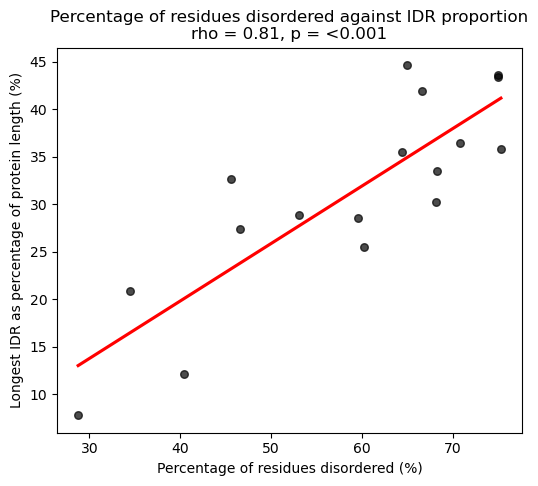

In [205]:
rho, pval = spearmanr(PDEP, LIPP)
if pval > 0.001:
    pval = f"{pval: .3f}"
else:
    pval = "<0.001"

plt.figure(figsize=(6,5))
sns.regplot(x=PDEP, y=LIPP, scatter_kws={
        "s": 30,           
        "color": "black",
        "alpha": 0.7
    }, line_kws={"color":"red"}, ci=None)

plt.title(f"""Percentage of residues disordered against IDR proportion
rho = {rho:.2f}, p = {pval}""")
plt.xlabel("Percentage of residues disordered (%)")
plt.ylabel("Longest IDR as percentage of protein length (%)")




plt.show()



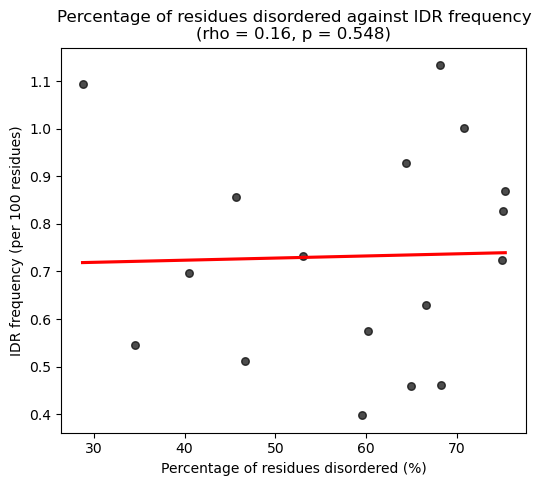

In [207]:
rho, pval = spearmanr(PDEP, IP1R)

plt.figure(figsize=(6,5))
sns.regplot(x=PDEP, y=IP1R, scatter_kws={
        "s": 30,           
        "color": "black",   
        "alpha": 0.7       
    }, line_kws={"color":"red"}, ci=None)

plt.title(f"""Percentage of residues disordered against IDR frequency
(rho = {rho:.2f}, p = {pval:.3f})""")
plt.xlabel("Percentage of residues disordered (%)")
plt.ylabel("IDR frequency (per 100 residues)")


plt.show()


30.2945301542777


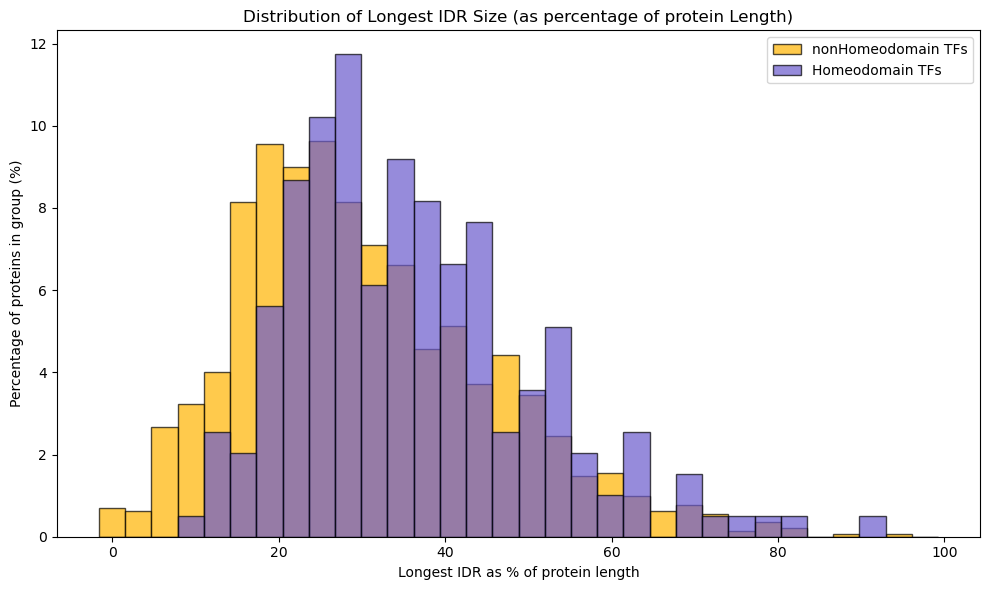

In [209]:
test_set_colour = "#6A5ACD"
control_colour = "#FFB400"

test_set = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]=="Homeodomain", "longest_IDR_as_percentage_of_protein"]
control = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]!="Homeodomain", "longest_IDR_as_percentage_of_protein"]
print(control_vals.median())

bins = np.arange(0, 101, 3.15)

array_test_set, bin_edges  = np.histogram(test_set, bins=bins)
array_control, _  = np.histogram(control, bins=bins)
positions = bin_edges[:-1] 

percentage_control = array_control / array_control.sum() * 100
percentage_test_set = array_test_set / array_test_set.sum() * 100

plt.figure(figsize=(10, 6))
plt.bar(positions, percentage_control, 3.15, alpha=0.7, color=control_colour, label="nonHomeodomain TFs", edgecolor="black")
plt.bar(positions, percentage_test_set, 3.15, alpha=0.7, color=test_set_colour, label="Homeodomain TFs", edgecolor="black")

plt.xlabel("Longest IDR as % of protein length")
plt.ylabel("Percentage of proteins in group (%)")
plt.title("Distribution of Longest IDR Size (as percentage of protein Length)")
plt.legend()
plt.tight_layout()
plt.show()



30.2945301542777


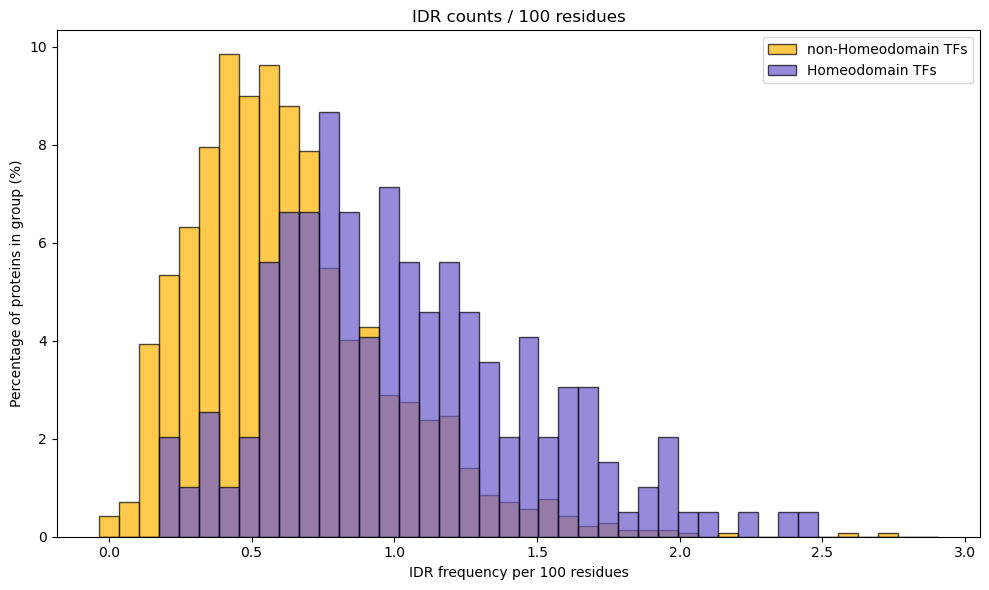

In [211]:
test_set_colour = "#6A5ACD"
control_colour = "#FFB400"

test_set = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]=="Homeodomain", "IDRs_per_100_residues"]
control = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]!="Homeodomain", "IDRs_per_100_residues"]
print(control_vals.median())

bins = np.arange(0, 3, 0.07)

array_test_set, bin_edges  = np.histogram(test_set, bins=bins)
array_control, _  = np.histogram(control, bins=bins)
positions = bin_edges[:-1] 

percentage_control = array_control / array_control.sum() * 100
percentage_test_set = array_test_set / array_test_set.sum() * 100

plt.figure(figsize=(10, 6))
plt.bar(positions, percentage_control, 0.07, alpha=0.7, color=control_colour, label="non-Homeodomain TFs", edgecolor="black")
plt.bar(positions, percentage_test_set, 0.07, alpha=0.7, color=test_set_colour, label="Homeodomain TFs", edgecolor="black")

plt.xlabel("IDR frequency per 100 residues")
plt.ylabel("Percentage of proteins in group (%)")
plt.title("IDR counts / 100 residues")
plt.legend()
plt.tight_layout()
plt.show()


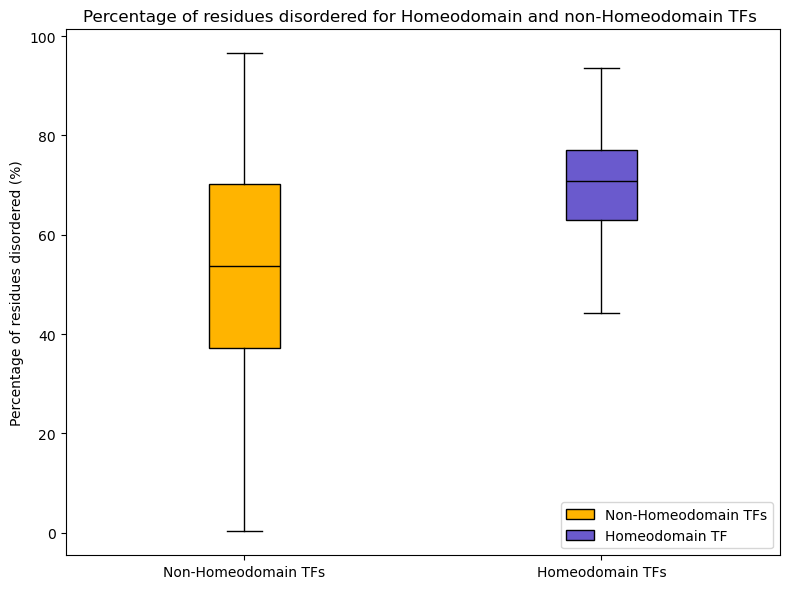

In [213]:
test_set_vals   = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]=="Homeodomain", "percent_disordered_res_for_entire_protein"]
control_vals = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]!="Homeodomain", "percent_disordered_res_for_entire_protein"]


fig, ax = plt.subplots(figsize=(8, 6))

bp = ax.boxplot(
    [control_vals, test_set_vals],
    tick_labels=["Non‑Homeodomain TFs", "Homeodomain TFs"],
    patch_artist=True,
    boxprops=dict(linewidth=1),
    medianprops=dict(linewidth=1, color="black"),
    widths=0.2,
    showfliers=False
)

colours = ["#FFB400", "#6A5ACD"]
bp_boxes = bp["boxes"]
bp_boxes[0].set_facecolor(colours[0])
bp_boxes[1].set_facecolor(colours[1])

ax.set_title("Percentage of residues disordered for Homeodomain and non-Homeodomain TFs ")
ax.set_ylabel("Percentage of residues disordered (%)")

legend_handles = [
    Patch(facecolor="#FFB400", edgecolor="black", label="Non‑Homeodomain TFs"),
    Patch(facecolor="#6A5ACD", edgecolor="black", label="Homeodomain TF")
]


ax.legend(handles=legend_handles, loc="lower right")

plt.tight_layout()
plt.show()




In [215]:
homeodomain_df = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]=="Homeodomain"]
homeodomain_PRD = homeodomain_df["percent_disordered_res_for_entire_protein"]
homeodomain_I1R = homeodomain_df["IDRs_per_100_residues"]
homeodomain_LIPP = homeodomain_df["longest_IDR_as_percentage_of_protein"]

spearmanr(
    homeodomain_df["percent_disordered_res_for_entire_protein"],
    homeodomain_df["IDRs_per_100_residues"]
)

homeodomain_df["Length_AlphaFold"].mean()



361.0816326530612

In [217]:
homeodomain_DF = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]=="Homeodomain"]
num_homeodomain_total = len(homeodomain_DF)
num_homeodomain_IDR = len(homeodomain_DF.loc[homeodomain_DF["Disordered_tail_N_or_C_presence"]==1])
num_homeodomain_IDR_no = len(homeodomain_DF.loc[homeodomain_DF["Disordered_tail_N_or_C_presence"]!=1])

non_homeodomain_DF = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]!="Homeodomain"]
num_non_homeodomain_total = len(non_homeodomain_DF)
num_non_homeodomain_IDR = len(non_homeodomain_DF.loc[non_homeodomain_DF["Disordered_tail_N_or_C_presence"]==1])
num_non_homeodomain_IDR_no = len(non_homeodomain_DF.loc[non_homeodomain_DF["Disordered_tail_N_or_C_presence"]!=1])

print(f"""
{num_homeodomain_IDR / num_homeodomain_total} = homeodomain terminal IDR frequency
{num_non_homeodomain_IDR / num_non_homeodomain_total} = all other TF terminal IDR frequency
""")





0.9081632653061225 = homeodomain terminal IDR frequency
0.8917779339423753 = all other TF terminal IDR frequency



In [219]:
HOX_DF = TFs_ALL_ACTUAL_RUN[TFs_ALL_ACTUAL_RUN["Entry_Name"].str.contains("HXA|HXB|HXC|HXD", regex=True)]
homeodomain_DF = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]=="Homeodomain"]
non_HOX_homeodomain_DF = homeodomain_DF[~homeodomain_DF["Entry_Name"].isin(HOX_DF["Entry_Name"])]




hox_vals = HOX_DF["IDRs_per_100_residues"]
non_hox_vals = non_HOX_homeodomain_DF["IDRs_per_100_residues"]

stat, p_value = mannwhitneyu(hox_vals, non_hox_vals, alternative="two-sided")
d, res = cliffs_delta(hox_vals, non_hox_vals)

print("IDR per 100 residues")
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")
print(f"{d}, {res}")


IDR per 100 residues
U-statistic: 2876.0
P-value: 0.5595482909660445
-0.060591213457455495, negligible


In [221]:
HOX_DF = TFs_ALL_ACTUAL_RUN[TFs_ALL_ACTUAL_RUN["Entry_Name"].str.contains("HXA|HXB|HXC|HXD", regex=True)]
homeodomain_DF = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]=="Homeodomain"]
non_HOX_homeodomain_DF = homeodomain_DF[~homeodomain_DF["Entry_Name"].isin(HOX_DF["Entry_Name"])]




hox_vals = HOX_DF["longest_IDR_as_percentage_of_protein"]
non_hox_vals = non_HOX_homeodomain_DF["longest_IDR_as_percentage_of_protein"]

stat, p_value = mannwhitneyu(hox_vals, non_hox_vals, alternative="two-sided")
d, res = cliffs_delta(hox_vals, non_hox_vals)

print("longest IDR as percentage of protein")
print(f"median HOX:{hox_vals.median()}, median non-HOX:{non_hox_vals.median()}")
print(f"U-statistic: {stat}")
print(f"P-value: {p_value:.6f}")
print(f"{d}, {res}")


longest IDR as percentage of protein
median HOX:45.74468085106383, median non-HOX:33.99014778325123
U-statistic: 4453.0
P-value: 0.000011
0.4545157602482443, medium


In [223]:
HOX_DF = TFs_ALL_ACTUAL_RUN[TFs_ALL_ACTUAL_RUN["Entry_Name"].str.contains("HXA|HXB|HXC|HXD", regex=True)]
homeodomain_DF = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]=="Homeodomain"]
non_HOX_homeodomain_DF = homeodomain_DF[~homeodomain_DF["Entry_Name"].isin(HOX_DF["Entry_Name"])]




hox_vals = HOX_DF["percent_disordered_res_for_entire_protein"]
non_hox_vals = non_HOX_homeodomain_DF["percent_disordered_res_for_entire_protein"]

stat, p_value = mannwhitneyu(hox_vals, non_hox_vals, alternative="two-sided")
d, res = cliffs_delta(hox_vals, non_hox_vals)

print("percentage of disordered residues")
print(f"median HOX:{hox_vals.median()}, median non-HOX:{non_hox_vals.median()}")
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")
print(f"{d}, {res}")

percentage of disordered residues
median HOX:74.3494423791822, median non-HOX:69.3877551020408
U-statistic: 4156.5
P-value: 0.0005561112492078554
0.3576678098971093, medium


In [225]:
HOX_DF = TFs_ALL_ACTUAL_RUN[TFs_ALL_ACTUAL_RUN["Entry_Name"].str.contains("HXA|HXB|HXC|HXD", regex=True)]
homeodomain_DF = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"] == "Homeodomain"]
non_HOX_homeodomain_DF = homeodomain_DF[~homeodomain_DF["Entry_Name"].isin(HOX_DF["Entry_Name"])]

hox_vals_total = len(HOX_DF)
hox_vals_yes = HOX_DF.loc[HOX_DF["Disordered_tail_N_or_C_presence"] == 1]

non_hox_vals_total = len(non_HOX_homeodomain_DF)
non_hox_vals_yes = non_HOX_homeodomain_DF.loc[non_HOX_homeodomain_DF["Disordered_tail_N_or_C_presence"] == 1]

hox_frequency = len(hox_vals_yes) / hox_vals_total
non_hox_frequency = len(non_hox_vals_yes) / non_hox_vals_total

print(f"""
{hox_frequency:.2%} = homeodomain terminal IDR frequency
{non_hox_frequency:.2%} = all other TF terminal IDR frequency
""")




92.31% = homeodomain terminal IDR frequency
90.45% = all other TF terminal IDR frequency



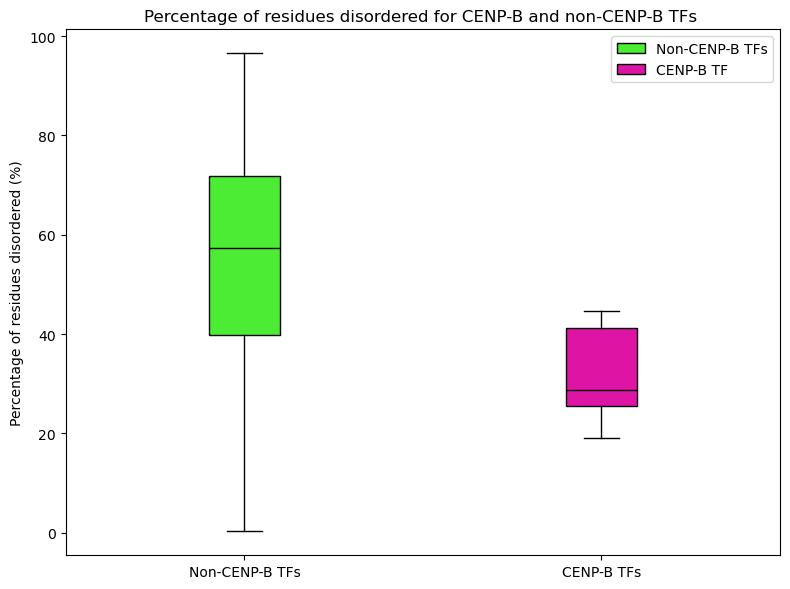

57.25626440092165


In [227]:
test_set_vals   = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]=="CENPB", "percent_disordered_res_for_entire_protein"]
control_vals = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]!="CENPB", "percent_disordered_res_for_entire_protein"]


fig, ax = plt.subplots(figsize=(8, 6))

bp = ax.boxplot(
    [control_vals, test_set_vals],
    tick_labels=["Non‑CENP-B TFs", "CENP-B TFs"],
    patch_artist=True,
    boxprops=dict(linewidth=1),
    medianprops=dict(linewidth=1, color="black"),
    widths=0.2,
    showfliers=False
)

colours = ["#4ceb34", "#de14a5"]
bp_boxes = bp["boxes"]
bp_boxes[0].set_facecolor(colours[0])
bp_boxes[1].set_facecolor(colours[1])

ax.set_title("Percentage of residues disordered for CENP-B and non-CENP-B TFs ")
ax.set_ylabel("Percentage of residues disordered (%)")

legend_handles = [
    Patch(facecolor="#4ceb34", edgecolor="black", label="Non‑CENP-B TFs"),
    Patch(facecolor="#de14a5", edgecolor="black", label="CENP-B TF")
]


ax.legend(handles=legend_handles, loc="upper right")

plt.tight_layout()
plt.show()
print(control_vals.median())


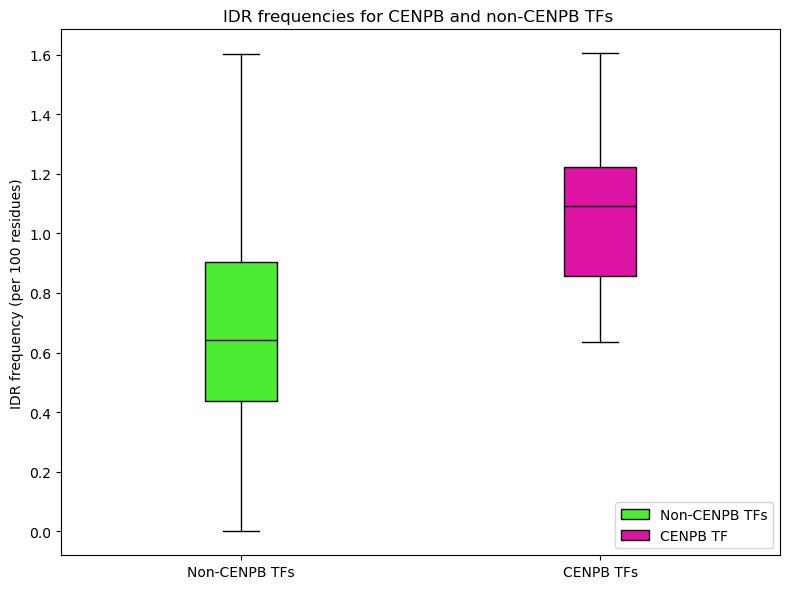

1.092896174863388
0.6422264307883729


In [229]:
test_set_vals   = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]=="CENPB", "IDRs_per_100_residues"]
control_vals = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]!="CENPB", "IDRs_per_100_residues"]


fig, ax = plt.subplots(figsize=(8, 6))

bp = ax.boxplot(
    [control_vals, test_set_vals],
    tick_labels=["Non‑CENPB TFs", "CENPB TFs"],
    patch_artist=True,
    boxprops=dict(linewidth=1),
    medianprops=dict(linewidth=1, color="black"),
    widths=0.2,
    showfliers=False
)

colours = ["#4ceb34", "#de14a5"]
bp_boxes = bp["boxes"]
bp_boxes[0].set_facecolor(colours[0])
bp_boxes[1].set_facecolor(colours[1])

ax.set_title("IDR frequencies for CENPB and non-CENPB TFs ")
ax.set_ylabel("IDR frequency (per 100 residues)")

legend_handles = [
    Patch(facecolor="#4ceb34", edgecolor="black", label="Non‑CENPB TFs"),
    Patch(facecolor="#de14a5", edgecolor="black", label="CENPB TF")
]


ax.legend(handles=legend_handles, loc="lower right")

plt.tight_layout()
plt.show()
print(test_set_vals.median())
print(control_vals.median())


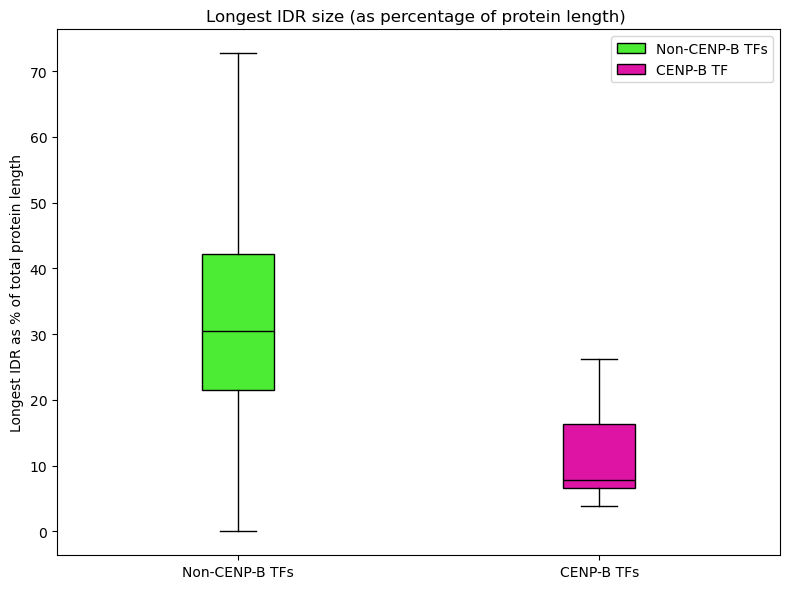

30.413425877483633


In [231]:
test_set_vals   = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]=="CENPB", "longest_IDR_as_percentage_of_protein"]
control_vals = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]!="CENPB", "longest_IDR_as_percentage_of_protein"]


fig, ax = plt.subplots(figsize=(8, 6))

bp = ax.boxplot(
    [control_vals, test_set_vals],
    tick_labels=["Non‑CENP-B TFs", "CENP-B TFs"],
    patch_artist=True,
    boxprops=dict(linewidth=1),
    medianprops=dict(linewidth=1, color="black"),
    widths=0.2,
    showfliers=False
)

colours = ["#4ceb34", "#de14a5"]
bp_boxes = bp["boxes"]
bp_boxes[0].set_facecolor(colours[0])
bp_boxes[1].set_facecolor(colours[1])

ax.set_title("Longest IDR size (as percentage of protein length) ")
ax.set_ylabel("Longest IDR as % of total protein length")

legend_handles = [
    Patch(facecolor="#4ceb34", edgecolor="black", label="Non‑CENP-B TFs"),
    Patch(facecolor="#de14a5", edgecolor="black", label="CENP-B TF")
]


ax.legend(handles=legend_handles, loc="upper right")

plt.tight_layout()
plt.show()
print(control_vals.median())


In [233]:
chi_squared_results = []

for dbd in test_DBDs:
    test_set_chi  = TFs_ALL_ACTUAL_RUN[TFs_ALL_ACTUAL_RUN["DBD"] == dbd]
    control = TFs_ALL_ACTUAL_RUN[TFs_ALL_ACTUAL_RUN["DBD"] != dbd]

    test_set_counts_yes   = len(test_set_chi.loc[test_set_chi["Disordered_tail_N_or_C_presence"]== 1])
    test_set_counts_no = len(test_set_chi) - test_set_counts_yes
    test_set_freq = (test_set_counts_yes / len(test_set_chi)) * 100
    
    control_counts_yes = len(control.loc[control["Disordered_tail_N_or_C_presence"]== 1])
    control_counts_no = len(control) - control_counts_yes
    control_set_freq = (control_counts_yes / len(control)) * 100

    

    contingency = [
        [test_set_counts_no, test_set_counts_yes],
        [control_counts_no, control_counts_yes]
    ]
    print(contingency)

    chi2, p, dof, expected = chi2_contingency(contingency)

    chi_squared_results.append({
        "DBD": dbd,
        "chi2_stat": chi2,
        "p_value": p,
        "degrees_of_freedom": dof,
        "DBD_frequency": test_set_freq
    })

chi_squared_df = pd.DataFrame(chi_squared_results)
chi_squared_df


[[89, 652], [83, 795]]
[[18, 178], [154, 1269]]
[[13, 94], [159, 1353]]
[[5, 48], [167, 1399]]
[[3, 46], [169, 1401]]
[[2, 44], [170, 1403]]
[[3, 27], [169, 1420]]
[[0, 27], [172, 1420]]
[[0, 16], [172, 1431]]
[[3, 11], [169, 1436]]
[[2, 12], [170, 1435]]
[[4, 8], [168, 1439]]
[[1, 10], [171, 1437]]
[[4, 7], [168, 1440]]
[[0, 10], [172, 1437]]
[[1, 9], [171, 1438]]
[[0, 10], [172, 1437]]


,DBD,chi2_stat,p_value,degrees_of_freedom,DBD_frequency
0,C2H2 ZF,2.505368,0.113459,1,87.989204
1,Homeodomain,0.329822,0.565764,1,90.816327
2,bHLH,0.135169,0.713132,1,87.850467
3,bZIP,0.003506,0.952784,1,90.566038
4,Forkhead,0.644829,0.421968,1,93.877551
5,Nuclear receptor,1.342610,0.246574,1,95.652174
6,HMG/Sox,0.000000,1.000000,1,90.000000
7,Ets,2.225156,0.135779,1,100.000000
8,T-box,0.957014,0.327940,1,100.000000
9,Myb/SANT,0.778161,0.377704,1,78.571429


In [235]:
pvals = chi_squared_df["p_value"]
reject, pvals_corrected, _, _ = multipletests(pvals, alpha=0.05, method="fdr_bh")

chi_squared_df["p_adj"] = pvals_corrected
chi_squared_df["significant"] = reject
chi_squared_df


,DBD,chi2_stat,p_value,degrees_of_freedom,DBD_frequency,p_adj,significant
0,C2H2 ZF,2.505368,0.113459,1,87.989204,0.577060,False
1,Homeodomain,0.329822,0.565764,1,90.816327,0.874362,False
2,bHLH,0.135169,0.713132,1,87.850467,1.000000,False
3,bZIP,0.003506,0.952784,1,90.566038,1.000000,False
4,Forkhead,0.644829,0.421968,1,93.877551,0.874362,False
5,Nuclear receptor,1.342610,0.246574,1,95.652174,0.838352,False
6,HMG/Sox,0.000000,1.000000,1,90.000000,1.000000,False
7,Ets,2.225156,0.135779,1,100.000000,0.577060,False
8,T-box,0.957014,0.327940,1,100.000000,0.874362,False
9,Myb/SANT,0.778161,0.377704,1,78.571429,0.874362,False


In [237]:
HOX_DF = TFs_ALL_ACTUAL_RUN[TFs_ALL_ACTUAL_RUN["Entry_Name"].str.contains("HXA|HXB|HXC|HXD", regex=True)]
homeodomain_DF = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]=="Homeodomain"]
non_HOX_homeodomain_DF = homeodomain_DF[~homeodomain_DF["Entry_Name"].isin(HOX_DF["Entry_Name"])]




hox_vals_counts_yes = len(HOX_DF.loc[HOX_DF["Disordered_tail_N_or_C_presence"] == 1])
hox_vals_counts_no = len(HOX_DF) - hox_vals_counts_yes
non_hox_vals_counts_yes = len(non_HOX_homeodomain_DF.loc[non_HOX_homeodomain_DF["Disordered_tail_N_or_C_presence"] == 1])
non_hox_vals_counts_no = len(non_HOX_homeodomain_DF) - non_hox_vals_counts_yes




contingency = [
    [hox_vals_counts_no, hox_vals_counts_yes],
    [non_hox_vals_counts_no, non_hox_vals_counts_yes]
]
print(contingency)

chi2, p, dof, expected = chi2_contingency(contingency)
print(p)



[[3, 36], [15, 142]]
0.9596656929712236


30.413425877483633


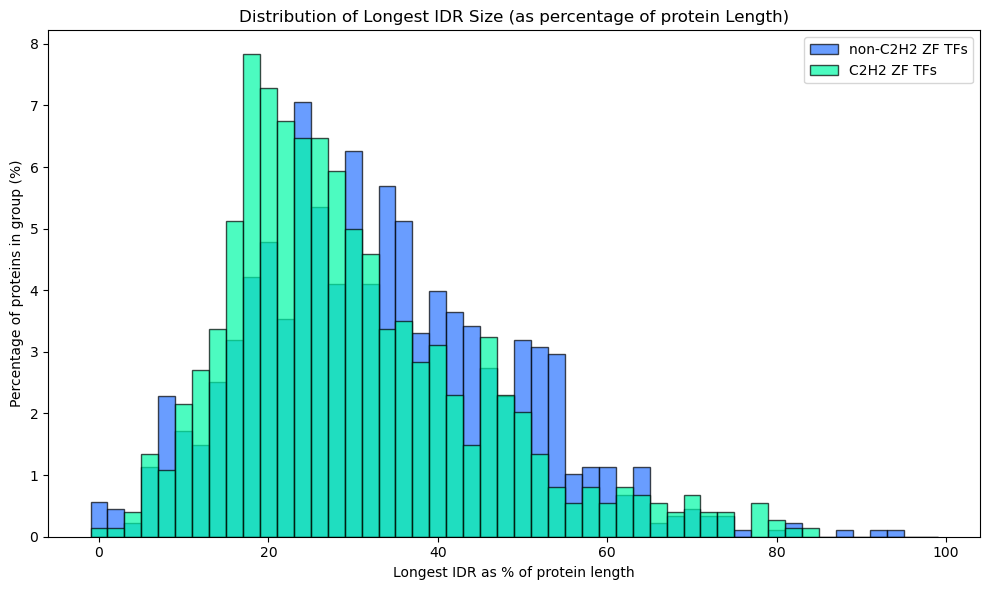

In [239]:
control_colour = "#2974FF"
test_set_colour = "#00FAA6"

test_set = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]=="C2H2 ZF", "longest_IDR_as_percentage_of_protein"]
control = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]!="C2H2 ZF", "longest_IDR_as_percentage_of_protein"]
print(control_vals.median())

bins = np.arange(0, 101, 2)

array_test_set, bin_edges  = np.histogram(test_set, bins=bins)
array_control, _  = np.histogram(control, bins=bins)
positions = bin_edges[:-1] 

percentage_control = array_control / array_control.sum() * 100
percentage_test_set = array_test_set / array_test_set.sum() * 100

plt.figure(figsize=(10, 6))
plt.bar(positions, percentage_control, 2, alpha=0.7, color=control_colour, label="non-C2H2 ZF TFs", edgecolor="black")
plt.bar(positions, percentage_test_set, 2, alpha=0.7, color=test_set_colour, label="C2H2 ZF TFs", edgecolor="black")

plt.xlabel("Longest IDR as % of protein length")
plt.ylabel("Percentage of proteins in group (%)")
plt.title("Distribution of Longest IDR Size (as percentage of protein Length)")
plt.legend()
plt.tight_layout()
plt.show()


30.413425877483633


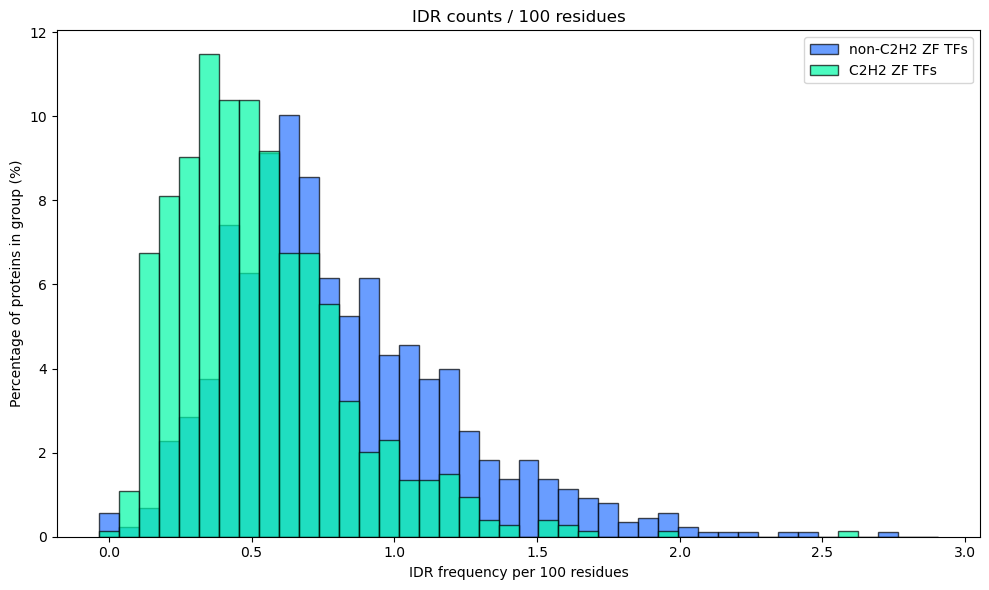

In [241]:
control_colour = "#2974FF"
test_set_colour = "#00FAA6"

test_set = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]=="C2H2 ZF", "IDRs_per_100_residues"]
control = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]!="C2H2 ZF", "IDRs_per_100_residues"]
print(control_vals.median())

bins = np.arange(0, 3, 0.07)

array_test_set, bin_edges  = np.histogram(test_set, bins=bins)
array_control, _  = np.histogram(control, bins=bins)
positions = bin_edges[:-1] 

percentage_control = array_control / array_control.sum() * 100
percentage_test_set = array_test_set / array_test_set.sum() * 100

plt.figure(figsize=(10, 6))
plt.bar(positions, percentage_control, 0.07, alpha=0.7, color=control_colour, label="non-C2H2 ZF TFs", edgecolor="black")
plt.bar(positions, percentage_test_set, 0.07, alpha=0.7, color=test_set_colour, label="C2H2 ZF TFs", edgecolor="black")

plt.xlabel("IDR frequency per 100 residues")
plt.ylabel("Percentage of proteins in group (%)")
plt.title("IDR counts / 100 residues")
plt.legend()
plt.tight_layout()
plt.show()


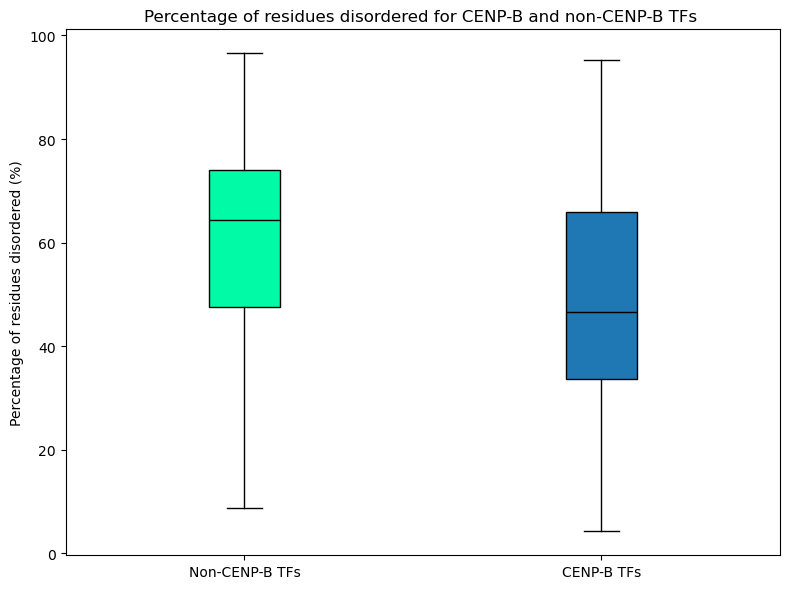

64.2840172601262


In [243]:
test_set_vals   = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]=="C2H2 ZF", "percent_disordered_res_for_entire_protein"]
control_vals = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["DBD"]!="C2H2 ZF", "percent_disordered_res_for_entire_protein"]


fig, ax = plt.subplots(figsize=(8, 6))

bp = ax.boxplot(
    [control_vals, test_set_vals],
    tick_labels=["Non‑CENP-B TFs", "CENP-B TFs"],
    patch_artist=True,
    boxprops=dict(linewidth=1),
    medianprops=dict(linewidth=1, color="black"),
    widths=0.2,
    showfliers=False
)

colours = ["#2974FF", "#00FAA6"]
bp_boxes = bp["boxes"]
bp_boxes[0].set_facecolor(colours[0])
bp_boxes[0].set_facecolor(colours[1])



ax.set_title("Percentage of residues disordered for CENP-B and non-CENP-B TFs ")
ax.set_ylabel("Percentage of residues disordered (%)")

legend_handles = [
    Patch(facecolor="#2974FF", edgecolor="black", label="Non‑C2H2 ZF TFs"),
    Patch(facecolor="#B4FF12", edgecolor="black", label="C2H2 ZF TF")
]



plt.tight_layout()
plt.show()
print(control_vals.median())


In [245]:
mismatch_count_TF = (TFs_ALL_ACTUAL_RUN["Length_UniProt"] != TFs_ALL_ACTUAL_RUN["Length_AlphaFold"]).sum()
print(mismatch_count_TF)


23


In [247]:
23 / len(TFs_ALL_ACTUAL_RUN) * 100

1.4206300185299567

In [249]:
All_proteins = pd.read_excel("dissertation_all_proteins_with_metrics.xlsx")
All_proteins

,Unnamed: 0,UniProt_id,Is_TF,Entry_Name,DBD,Length_UniProt,Length_AlphaFold,AlphaFold_Species,AlphaFold_UniProt_id,AlphaFold_Entry_Name,...,Disordered_tails_N_and_C_presence,n_IDR_pLDDT_mean,c_IDR_pLDDT_mean,number_of_dis_regions_over_10_res,disordered_regions,average_length_dis_region,longest_length_dis_region,shortest_length_dis_region,longest_IDR_as_percentage_of_protein,IDRs_per_100_residues
0,0,P05549,1,AP2A_HUMAN,AP-2,437,437,Homo sapiens,P05549,AP2A_HUMAN,...,1,43.393585,49.848571,3,"[53, 143, 22]",72.666667,143,22,32.723112,0.686499
1,1,Q92481,1,AP2B_HUMAN,AP-2,460,460,Homo sapiens,Q92481,AP2B_HUMAN,...,1,44.310152,48.026522,3,"[66, 150, 24]",80.000000,150,24,32.608696,0.652174
2,2,Q92754,1,AP2C_HUMAN,AP-2,450,450,Homo sapiens,Q92754,AP2C_HUMAN,...,1,43.309286,48.914500,3,"[56, 156, 21]",77.666667,156,21,34.666667,0.666667
3,3,Q7Z6R9,1,AP2D_HUMAN,AP-2,452,452,Homo sapiens,Q7Z6R9,AP2D_HUMAN,...,1,36.173382,45.194474,2,"[204, 39]",121.500000,204,39,45.132743,0.442478
4,4,Q6VUC0,1,AP2E_HUMAN,AP-2,442,442,Homo sapiens,Q6VUC0,AP2E_HUMAN,...,1,44.250588,49.855000,3,"[51, 155, 19]",75.000000,155,19,35.067873,0.678733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20109,20109,A0A0A0MTA7,0,TJB21_HUMAN,NaN,16,16,Homo sapiens,A0A0A0MTA7,TJB21_HUMAN,...,0,NaN,NaN,0,[],0.000000,0,0,0.000000,0.000000
20110,20110,A0A0B4J200,0,TJB23_HUMAN,NaN,16,16,Homo sapiens,A0A0B4J200,TJB23_HUMAN,...,0,NaN,NaN,0,[],0.000000,0,0,0.000000,0.000000
20111,20111,A0A0J9YWP8,0,TJB13_HUMAN,NaN,16,16,Homo sapiens,A0A0J9YWP8,TJB13_HUMAN,...,0,NaN,NaN,0,[],0.000000,0,0,0.000000,0.000000
20112,20112,A0A0J9YXG5,0,TJB14_HUMAN,NaN,16,16,Homo sapiens,A0A0J9YXG5,TJB14_HUMAN,...,0,NaN,NaN,0,[],0.000000,0,0,0.000000,0.000000


In [250]:
tf_LIPP = All_proteins[All_proteins["Is_TF"] == 1]["longest_IDR_as_percentage_of_protein"].dropna()
non_tf_LIPP = All_proteins[All_proteins["Is_TF"] == 0]["longest_IDR_as_percentage_of_protein"].dropna()

print(tf_LIPP.median())
print(non_tf_LIPP.median())


30.25210084033613
13.4841628959276


In [251]:
tf_IP1R = All_proteins[All_proteins["Is_TF"] == 1]["IDRs_per_100_residues"].dropna()
non_tf_IP1R = All_proteins[All_proteins["Is_TF"] == 0]["IDRs_per_100_residues"].dropna()

print(tf_IP1R.median())
print(non_tf_IP1R.median())

0.6436041834271923
0.5494505494505495


In [252]:
mismatch_count_ALL = (All_proteins["Length_UniProt"] != All_proteins["Length_AlphaFold"]).sum()
print(mismatch_count_ALL)

266


In [253]:
266 / len(All_proteins) * 100

1.322461966789301

In [254]:
TFs_no_IDRs = TFs_ALL_ACTUAL_RUN.loc[TFs_ALL_ACTUAL_RUN["number_of_dis_regions_over_10_res"] == 0]
len(TFs_no_IDRs)

6

In [28]:
len(TFs_ALL_ACTUAL_RUN)

1619

In [56]:
TF_list_DBDs = TFs_ALL_ACTUAL_RUN["DBD"]
TF_list_DBDs.nunique()

64